In [15]:
# this code help to ensure you do not need to restart kernal each tim,e you are testing code
%load_ext autoreload
%load_ext sql
%autoreload 2

import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from config import settings


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [16]:
# Import `AlphaVantageAPI`
from data import AlphaVantageAPI

# Create instance of `AlphaVantageAPI` class
av = AlphaVantageAPI()

print("av type:", type(av))

av type: <class 'data.AlphaVantageAPI'>


In [17]:
# Define tsla ticker symbol
ticker = "AAPL"

# Use your `av` object to get daily data
df_aapl = av.get_daily(ticker=ticker)

print("df_aapl type:", type(df_aapl))
print("df_aapl shape:", df_aapl.shape)
df_aapl.head()

df_aapl type: <class 'pandas.core.frame.DataFrame'>
df_aapl shape: (6542, 5)


,open,high,low,close,volume
date,,,,,
2025-11-03,270.420,270.85,266.25,269.05,50194583.0
2025-10-31,276.990,277.32,269.16,270.37,86167123.0
2025-10-30,271.990,274.14,268.48,271.40,69886534.0
2025-10-29,269.275,271.41,267.11,269.70,51086742.0
2025-10-28,268.985,269.89,268.15,269.00,41534759.0


In [18]:
# Does `get_daily` return a DataFrame?
assert isinstance (df_aapl,pd.DataFrame)

# Does DataFrame have 5 columns?
assert df_aapl.shape[1]==5


# Does DataFrame have a DatetimeIndex?
assert isinstance (df_aapl.index,pd.DatetimeIndex)

# Is the index name "date"
assert df_aapl.index.name=="date"

In [19]:
# Does DataFrame have correct column names?
assert df_aapl.columns.to_list()==["open","high","low","close","volume"]


# Are columns correct data type?
assert all(df_aapl.dtypes==float)

In [20]:
settings.db_name

'stocks.sqlite'

In [21]:
connection=sqlite3.connect(database=settings.db_name,check_same_thread=False)
print("connection type",type(connection))

connection type <class 'sqlite3.Connection'>


In [22]:
#import class defination
from data import SQLRepository
#create instance of class
repo=SQLRepository(connection=connection)
#tests
#does repo has a connection attribute
assert hasattr(repo,"connection")
#is the "connection" attribute a sqlite.Connection
assert isinstance(repo.connection,sqlite3.Connection)

In [23]:
response=repo.insert_table(table_name=ticker,records=df_aapl,if_exists="replace")
#tests
#Does the method return dictionary 
assert isinstance(response,dict)
#Are the keys of the dictionary correct
assert sorted(list(response.keys()))==["records_inserted","transaction_successful"]

In [24]:
%sql sqlite:///stocks.sqlite

In [25]:
sql="SELECT* FROM 'AAPL'"
df_aapl_test=pd.read_sql(
    sql=sql,con=connection,parse_dates=["date"],index_col="date"
)
print("df_aapl_test type:",type(df_aapl_test))
print()
print(df_aapl_test.info())
df_aapl_test.head()

df_aapl_test type: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6542 entries, 2025-11-03 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6542 non-null   float64
 1   high    6542 non-null   float64
 2   low     6542 non-null   float64
 3   close   6542 non-null   float64
 4   volume  6542 non-null   float64
dtypes: float64(5)
memory usage: 306.7 KB
None


,open,high,low,close,volume
date,,,,,
2025-11-03,270.420,270.85,266.25,269.05,50194583.0
2025-10-31,276.990,277.32,269.16,270.37,86167123.0
2025-10-30,271.990,274.14,268.48,271.40,69886534.0
2025-10-29,269.275,271.41,267.11,269.70,51086742.0
2025-10-28,268.985,269.89,268.15,269.00,41534759.0


In [28]:
#Assert statement for read table function 
# Assign `read_table` output to `df_aapl`
df_aapl = read_table(table_name ="AAPL", limit=2500)  # noQA F821

# Is `df_suzlon` a DataFrame?

assert isinstance (df_aapl,pd.DataFrame)
# Does it have a `DatetimeIndex`?

assert isinstance(df_aapl.index,pd.DatetimeIndex)
# Is the index named "date"?
assert df_aapl.index.name=="date"

# Does it have 2,500 rows and 5 columns?
assert df_aapl.shape==(2500,5)

# Are the column names correct?
assert df_aapl.columns.to_list()==["open","high","low","close","volume"]


# Are the column data types correct?
assert all(df_aapl.dtypes==float)


# Print `df_suzlon` info
print("df_aapl shape:", df_aapl.shape)
print()
print(df_aapl.info())
df_aapl.head()

df_aapl shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-11-03 to 2015-11-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2025-11-03,270.420,270.85,266.25,269.05,50194583.0
2025-10-31,276.990,277.32,269.16,270.37,86167123.0
2025-10-30,271.990,274.14,268.48,271.40,69886534.0
2025-10-29,269.275,271.41,267.11,269.70,51086742.0
2025-10-28,268.985,269.89,268.15,269.00,41534759.0


In [27]:
# Read table function
def read_table(table_name, limit=None):
    """Read table from database.

    Parameters
    ----------
    table_name : str
        Name of table in SQLite database.
    limit : int, None, optional
        Number of most recent records to retrieve. If `None`, all
        records are retrieved. By default, `None`.

    Returns
    -------
    pd.DataFrame
        Index is DatetimeIndex "date". Columns are 'open', 'high',
        'low', 'close', and 'volume'. All columns are numeric.
    """
    # Create SQL query (with optional limit)
    if limit:
        sql = f"SELECT * FROM '{table_name}' LIMIT {limit}"
    else:
        sql = f"SELECT * FROM '{table_name}'"

    # Retrieve data, read into DataFrame
    df = pd.read_sql(
        sql=sql, con=connection, parse_dates=["date"], index_col="date"
    )

    # Return DataFrame
    return df

In [29]:
#Assert statement for read table method in the SQLRepository class
# Assign `read_table` output to `df_aapl`
df_aapl = repo.read_table(table_name ="AAPL", limit=2500)  # noQA F821

# Is `df_suzlon` a DataFrame?

assert isinstance (df_aapl,pd.DataFrame)
# Does it have a `DatetimeIndex`?

assert isinstance(df_aapl.index,pd.DatetimeIndex)
# Is the index named "date"?
assert df_aapl.index.name=="date"

# Does it have 2,500 rows and 5 columns?
assert df_aapl.shape==(2500,5)

# Are the column names correct?
assert df_aapl.columns.to_list()==["open","high","low","close","volume"]


# Are the column data types correct?
assert all(df_aapl.dtypes==float)


# Print `df_suzlon` info
print("df_aapl shape:", df_aapl.shape)
print()
print(df_aapl.info())
df_aapl.head()

df_aapl shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-11-03 to 2015-11-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2025-11-03,270.420,270.85,266.25,269.05,50194583.0
2025-10-31,276.990,277.32,269.16,270.37,86167123.0
2025-10-30,271.990,274.14,268.48,271.40,69886534.0
2025-10-29,269.275,271.41,267.11,269.70,51086742.0
2025-10-28,268.985,269.89,268.15,269.00,41534759.0


In [ ]:
#COMPARING STOCKS RETURNS

In [30]:
ticker = "TSLA"

# Get tsla data using `av`
tsla_records = av.get_daily(ticker=ticker)

# Insert `ambuja_records` database using `repo`
response =repo.insert_table(
    table_name=ticker,records=tsla_records,if_exists="replace"
)

response

{'transaction_successful': True, 'records_inserted': 3862}

In [31]:
ticker="TSLA"
df_tsla=repo.read_table(table_name=ticker,limit=2500
)
print("df_tsla type:",type(df_tsla))
print("df_tsla shape",df_tsla.shape)
df_tsla.head()

df_tsla type: <class 'pandas.core.frame.DataFrame'>
df_tsla shape (2500, 5)


,open,high,low,close,volume
date,,,,,
2025-11-03,455.990,474.0700,453.8000,468.37,84595244.0
2025-10-31,446.750,458.0000,443.6855,456.56,83135787.0
2025-10-30,451.050,455.0607,439.6100,440.10,72447938.0
2025-10-29,462.500,465.7000,452.6500,461.51,67983544.0
2025-10-28,454.775,467.0000,451.6000,460.55,80185667.0


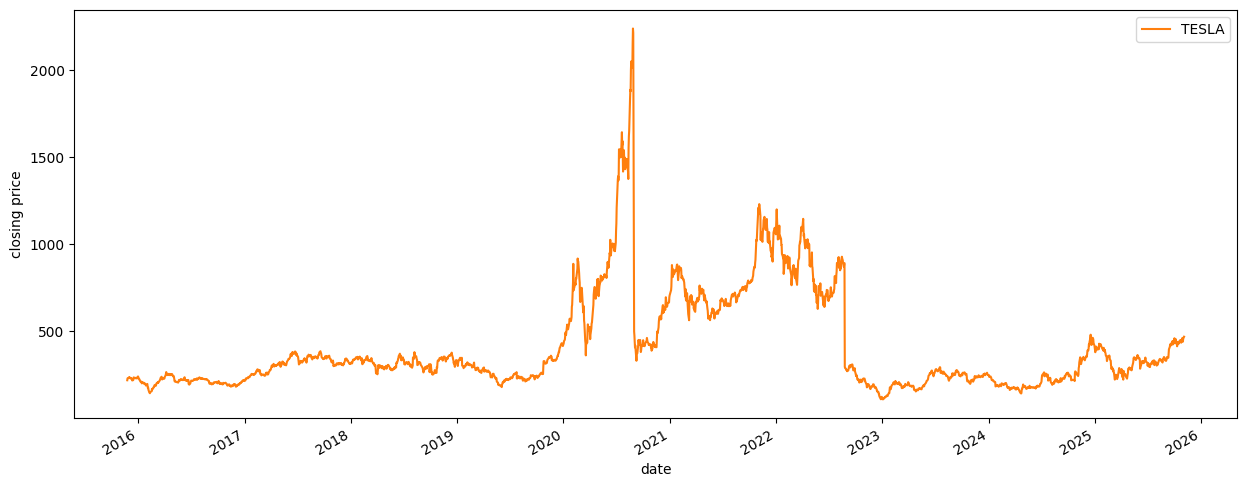

In [32]:
#plot TSLA closing price
fig,ax=plt.subplots(figsize=(15,6))
df_tsla["close"].plot(ax=ax,label="TESLA",color="C1")
#axes
plt.xlabel("date")
plt.ylabel("closing price")
#Add legend
plt.legend()

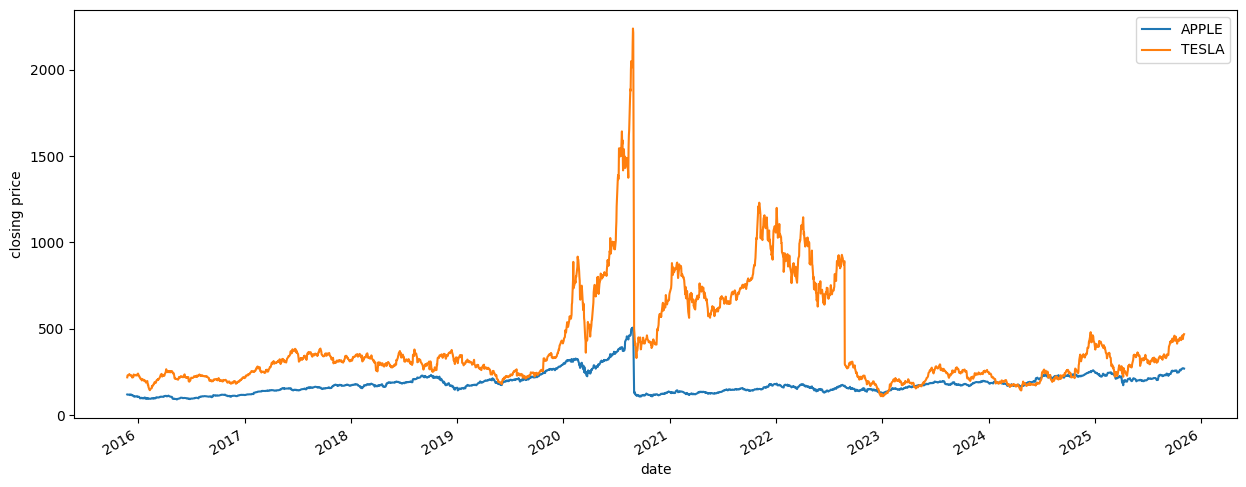

In [33]:
# comparing closing price of TESLA and APPLE
fig, ax=plt.subplots(figsize=(15,6))
df_aapl["close"].plot(ax=ax,label="APPLE")
df_tsla["close"].plot(ax=ax,label="TESLA",color="C1")
#axes
plt.xlabel("date")
plt.ylabel("closing price")
#save png
plt.savefig('Tesla_vs_Apple_Closing_Price.png', dpi=300, bbox_inches='tight')
#Add legend
plt.legend()


In [34]:
#calculating returns for TESLA stock
#sort dataframe ascending by date 
df_tsla.sort_index(ascending=True,inplace=True)
#create return column
df_tsla["return"]=df_tsla["close"].pct_change()*100
print("df_tsla shape:",df_tsla.shape)
print(df_tsla.info())
df_tsla.head()

df_tsla shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2015-11-24 to 2025-11-03
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2015-11-24,215.37,221.000,215.000,218.25,2480293.0,NaN
2015-11-25,221.34,230.825,220.375,229.64,3990779.0,5.218786
2015-11-27,231.06,232.250,227.010,231.61,1949353.0,0.857864
2015-11-30,231.79,234.280,229.080,230.26,2659813.0,-0.582876
2015-12-01,231.06,238.000,231.050,237.19,3733955.0,3.009641


In [35]:
# calculating returns for APPLE stock
#sort dataframe  ascending by date
df_aapl.sort_index(ascending=True,inplace=True)
#create return column
df_aapl["return"]=df_aapl["close"].pct_change()*100
print("df_aapl shape:",df_aapl.shape)
print(df_aapl.info())
df_aapl.head()

df_aapl shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2015-11-24 to 2025-11-03
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2015-11-24,117.33,119.35,117.12,118.88,42803172.0,NaN
2015-11-25,119.21,119.23,117.92,118.03,21388308.0,-0.715007
2015-11-27,118.29,118.41,117.60,117.81,13046445.0,-0.186393
2015-11-30,117.99,119.41,117.75,118.30,39180322.0,0.415924
2015-12-01,118.75,118.81,116.86,117.34,34852374.0,-0.811496


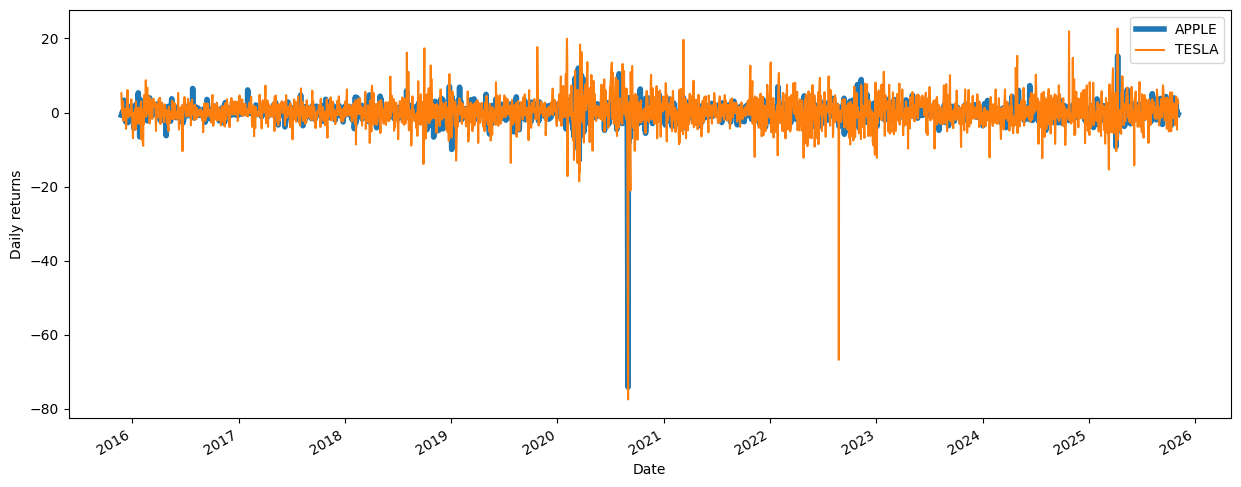

In [36]:
# comparing returns of TESLA and APPLE
fig, ax=plt.subplots(figsize=(15,6))
df_aapl["return"].plot(ax=ax,label="APPLE",linewidth=4)
df_tsla["return"].plot(ax=ax,label="TESLA",color="C1")
#axes
plt.xlabel("Date")
plt.ylabel("Daily returns")
#Add legend
plt.legend()